<a href="https://colab.research.google.com/github/HolyMuchii/ProcesamientoImagenesTPs/blob/main/TP7/TP7_Murilo_Alves_Lima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP7 PROCESAMIENTO MORFOLÓGICO

Desarrollar un aplicativo que permita abrir una imagen y automáticamente convertirla a niveles de grises (en caso de no estarlo) y visualizarla. Con esta imagen se aplicarán los siguientes filtros morfológicos, los cuales deben poderse seleccionar de una lista:

- Erosión (tomar el mínimo valor de luminancia de la vecindad).
- Dilatación (máximo)
- Apertura
-Cierre
- Borde morfológico (frontera interna y externa)
- Mediana
- Top-hat

El elemento estructurante será de una ventana de 3x3 pixeles.

El aplicativo debe incluir una función de copiado de la imagen procesada, de tal manera que esta pueda tomarse como imagen de entrada para así poder aplicar dos o más filtros en secuencia.

El resultado del filtro debe poder guardarse como una nueva imagen en nivel de grises.

Adicionalmente se debe mostrar un plot con el resultado respectivo para cada uno de los filtros indicados.

FECHA DE ENTREGA: 26 DE NOVIEMBRE

In [44]:
!git clone https://github.com/HolyMuchii/ProcesamientoImagenesTPs.git

Cloning into 'ProcesamientoImagenesTPs'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 78 (delta 27), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (78/78), done.


In [43]:
import imageio as io
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [45]:
def image_to_rgb(image):
  r = image[:,:,0]
  g = image[:,:,1]
  b = image[:,:,2]
  return r,g,b

def rgb_to_y(r,g,b):
  y = (0.299*r + 0.587*g + 0.114*b)/255
  np.clip(y,0,1)
  return y

def adapt_image_to_exels(y,exels):
  mi = (len(exels[0])-1)/2
  ni = (len(exels[1])-1)/2
  ms = ((len(exels[0])-1)/2)+len(y[:,0])-1
  ns = ((len(exels[1])-1)/2)+len(y[0])-1
  imagek = np.zeros(((y.shape[0]+exels.shape[0]-1),(y.shape[1]+exels.shape[1]-1)))
  for m in range(imagek.shape[0]):
    for n in range(imagek.shape[1]):
      if m < mi or n < ni or m > ms or n > ns:
        imagek[m,n] = 0
      else:
        imagek[m,n] = y[m - int(mi), n - int(ni)]
  imagek[0:int(mi),] = imagek[int(mi),:]
  imagek[int(mi)+y.shape[0]:imagek.shape[0],] = imagek[int(mi)+y.shape[0]-1,]
  for s in range(int(ni)):
    imagek[:,int((ni)-1)- s ] = imagek[:,int(ni)]
    imagek[:,int(ni)+y.shape[1] + s ] = imagek[:,int(ni)+y.shape[1]-1]
  return imagek

def erosion_morphological_image(image,exels,color):
  ic = imagexels.shape[0] - (exels.shape[0]-1)
  jc = imagexels.shape[1] - (exels.shape[1]-1)
  imagec = np.zeros((ic,jc))
  if color == 1:
    col=0
  elif color == 0:
    col=1
  for i in range(ic):
    for j in range(jc):
      imagesize = imagexels[i:i+exels.shape[0],j:j+exels.shape[1]]
      ind=0
      for m in range(imagesize.shape[0]):
        for n in range(imagesize.shape[1]):
          if imagesize[m,n] == exels[m,n]:
            ind=ind+1
          else:
            ind=ind
          if ind == (exels.shape[0]*exels.shape[1]):
            imagec[i,j] = color
          else:
            imagec[i,j] = col
  return imagec

def dilation_morphological_image(image,exels,color):
  ic = imagexels.shape[0] - (exels.shape[0]-1)
  jc = imagexels.shape[1] - (exels.shape[1]-1)
  imagec = np.zeros((ic,jc))
  if color == 1:
    col=0
  elif color == 0:
    col=1
  for i in range(ic):
    for j in range(jc):
      imagesize = imagexels[i:i+exels.shape[0],j:j+exels.shape[1]]
      ind=0
      for m in range(imagesize.shape[0]):
        for n in range(imagesize.shape[1]):
          if imagesize[m,n] == exels[m,n]:
            ind=ind+1
          else:
            ind=ind
          if ind > 0:
            imagec[i,j] = color
          else:
            imagec[i,j] = col
  return imagec


def median_morphological_image(image,exels):
  ic = imagexels.shape[0] - (exels.shape[0]-1)
  jc = imagexels.shape[1] - (exels.shape[1]-1)
  med = int((len(exels)/2)+0.5)
  imagec = np.zeros((ic,jc))
  for i in range(ic):
    for j in range(jc):
      imagesize = imagexels[i:i+exels.shape[0],j:j+exels.shape[1]]
      imagesizer = imagesize.ravel()
      imagesizer.sort()
      imagec[i,j] = imagesizer[med]
  return imagec


## **Paso 01:** Seleccione la Imagen Deseada

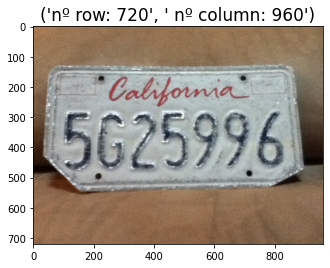

In [46]:
# example: http://license-plates.weebly.com/uploads/1/3/4/1/13417171/__2350909_orig.jpg
Image_Diretory = 'http://license-plates.weebly.com/uploads/1/3/4/1/13417171/__2350909_orig.jpg' #@param {type:"string"}
image01 = io.imread(Image_Diretory)
title = 'nº row: '+str(image01.shape[0]),' nº column: '+str(image01.shape[1])
plt.imshow(image01)
plt.title(title,fontsize=17)
plt.show()

## **Paso 02** - Recortar a Imagem

In [22]:
image01.shape

(720, 960, 3)

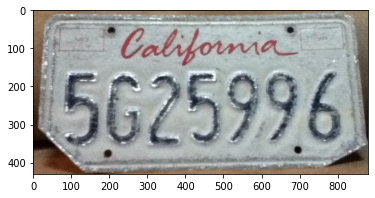

In [47]:
#@title Selecccione Limites { run: "auto" }
Top_row = 120 #@param {type:"string"}
Bottom_row = 550 #@param {type:"string"}
Left_column = 20  #@param {type:"string"}
Right_column ="900" #@param {type:"string"}


Top_row = int(Top_row)
Bottom_row = int(Bottom_row)
Left_column = int(Left_column)
Right_column = int(Right_column)

image02=image01[Top_row:Bottom_row,Left_column:Right_column,:]
plt.imshow(image02)

## **Paso 03** - Transforma la Imagen en una Matriz Binaria

(-0.05, 1.0499999999999998, 139816.38890234384, 240970.1330688223)

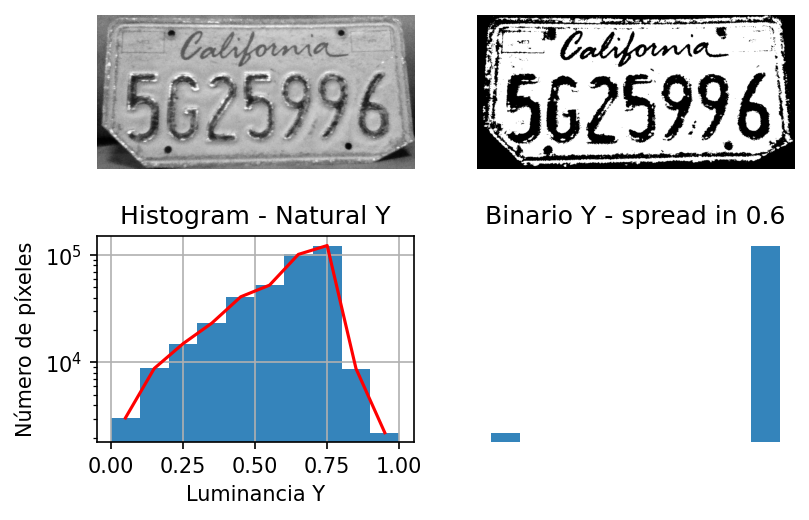

In [48]:
#@title Selecccione Limites { run: "auto" }
Image = "Cutted" #@param ['Original','Cutted']
if Image == 'Original':
  imager = image01
elif Image == 'Cutted':
  imager = image02

r,g,b = image_to_rgb(image02)
y = rgb_to_y(r,g,b)

Y_limite = 0.6 #@param {type:"slider", min:0, max:1, step:0.05}
y01 = np.where(y<Y_limite,0,y)
y01 = np.where(y01>=Y_limite,1,y01)

y.ravel() # Transforma a matrix em um vetor
hist,border = np.histogram(y.ravel(),10,[0,1])

y01.ravel() # Transforma a matrix em um vetor
hist1,border1 = np.histogram(y01.ravel(),10,[0,1])

fig,ax = plt.subplots(2,2, dpi=150)
ax[0,0].imshow(y,'gray')
ax[0,0].axis('off')
ax[1,0].bar((border[1:]+border[:-1])/2,hist,width=border[1]-border[0], alpha=0.9,log=True)
ax[1,0].plot((border[1:]+border[:-1])/2,hist,color="red")
ax[1,0].set_title("Histogram - Natural Y")
ax[1,0].grid(True)
ax[1,0].set_xlabel('Luminancia Y')
ax[1,0].set_ylabel('Número de píxeles')
ax[0,1].imshow(y01,'gray')
ax[0,1].axis('off')
ax[1,1].bar((border1[1:]+border1[:-1])/2,hist1,width=border1[1]-border1[0], alpha=0.9,log=True)
ax[1,1].set_title("Binario Y - spread in "+str(Y_limite))
ax[1,1].grid(True)
ax[1,1].set_xlabel('Luminancia Y')
ax[1,1].set_ylabel('Número de píxeles')
ax[1,1].axis('off')


## **Paso 04** - Elección y Uso de Un Proceso de Obtención Morfológicas de Imágenes

### Morphological Operations  -  Erosion

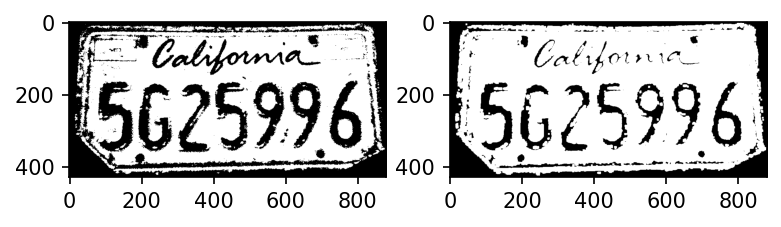

In [52]:
#@title Selecccione Limites { run: "auto" }
Figure_of_Interest_Colour = "Black" #@param ['White','Black']
Exels_Size = 3 #@param {type:"slider", min:3, max:7, step:2}

if Figure_of_Interest_Colour == "White":
  exels = np.zeros((Exels_Size,Exels_Size))+1
  color=1
elif Figure_of_Interest_Colour == "Black":
  exels = np.zeros((Exels_Size,Exels_Size))
  color=0

imagek = y01.copy()

Repeat = 2 #@param {type:"slider", min:1, max:50, step:1}
for z in range(Repeat):
  imagexels = adapt_image_to_exels(imagek,exels)
  imagek = erosion_morphological_image(imagexels,exels,color)

Save_Image = "No" #@param ['Yes','No']
if Save_Image == "Yes":
  name = "Erosion_Morph_Image"
  io.imwrite(name +'.jpg', imagek)
elif Save_Image == "No":
  imagek = imagek



fig,ax = plt.subplots(1,2, dpi=150)
ax[0].imshow(y01,'gray')
ax[1].imshow(imagek,'gray')

### Morphological Operations  -  Dilation

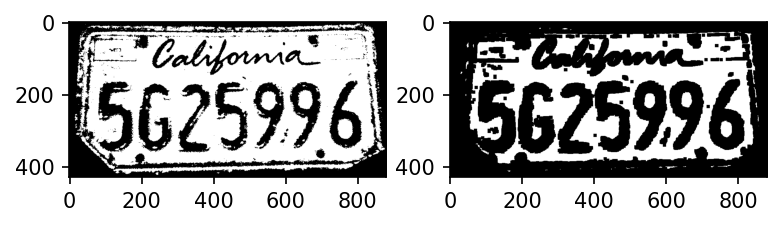

In [53]:
#@title Selecccione Limites { run: "auto" }
Figure_of_Interest_Colour = "Black" #@param ['White','Black']
Exels_Size = 3 #@param {type:"slider", min:3, max:7, step:2}

if Figure_of_Interest_Colour == "White":
  exels = np.zeros((Exels_Size,Exels_Size))+1
  color=1
elif Figure_of_Interest_Colour == "Black":
  exels = np.zeros((Exels_Size,Exels_Size))
  color=0

imagek = y01.copy()

Repeat = 4 #@param {type:"slider", min:1, max:50, step:1}
for z in range(Repeat):
  imagexels = adapt_image_to_exels(imagek,exels)
  imagek = dilation_morphological_image(imagexels,exels,color)

Save_Image = "No" #@param ['Yes','No']
if Save_Image == "Yes":
  name = "Dilation_Morph_Image"
  io.imwrite(name +'.jpg', imagek)
elif Save_Image == "No":
  imagek = imagek

fig,ax = plt.subplots(1,2, dpi=150)
ax[0].imshow(y01,'gray')
ax[1].imshow(imagek,'gray')

### Morphological Operations  -  Opening

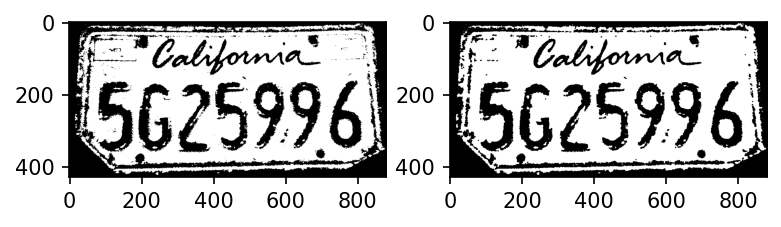

In [55]:
#@title Selecccione Limites { run: "auto" }
Figure_of_Interest_Colour = "Black" #@param ['White','Black']
Exels_Size = 3 #@param {type:"slider", min:3, max:7, step:2}

if Figure_of_Interest_Colour == "White":
  exels = np.zeros((Exels_Size,Exels_Size))+1
  color=1
elif Figure_of_Interest_Colour == "Black":
  exels = np.zeros((Exels_Size,Exels_Size))
  color=0

imagek = y01.copy()

Repeat = 27 #@param {type:"slider", min:1, max:50, step:1}
for z in range(Repeat):
  imagexels = adapt_image_to_exels(imagek,exels)
  imagek = erosion_morphological_image(imagexels,exels,color)
  imagexels = adapt_image_to_exels(imagek,exels)
  imagek = dilation_morphological_image(imagexels,exels,color)

Save_Image = "No" #@param ['Yes','No']
if Save_Image == "Yes":
  name = "Opening_Morph_Image"
  io.imwrite(name +'.jpg', imagek)
elif Save_Image == "No":
  imagek = imagek

fig,ax = plt.subplots(1,2, dpi=150)
ax[0].imshow(y01,'gray')
ax[1].imshow(imagek,'gray')

### Morphological Operations  -  Closing

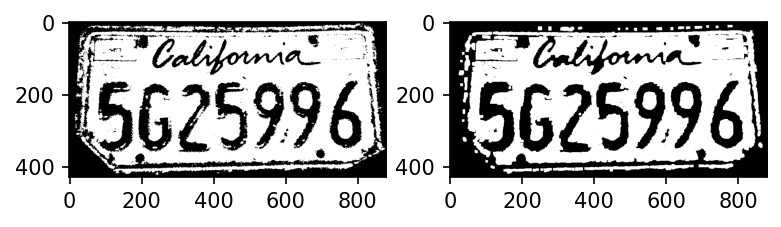

In [56]:
#@title Selecccione Limites { run: "auto" }
Figure_of_Interest_Colour = "Black" #@param ['White','Black']
Exels_Size = 7 #@param {type:"slider", min:3, max:7, step:2}

if Figure_of_Interest_Colour == "White":
  exels = np.zeros((Exels_Size,Exels_Size))+1
  color=1
elif Figure_of_Interest_Colour == "Black":
  exels = np.zeros((Exels_Size,Exels_Size))
  color=0

imagek = y01.copy()

Repeat = 17 #@param {type:"slider", min:1, max:50, step:1}
for z in range(Repeat):
  imagexels = adapt_image_to_exels(imagek,exels)
  imagek = dilation_morphological_image(imagexels,exels,color)
  imagexels = adapt_image_to_exels(imagek,exels)
  imagek = erosion_morphological_image(imagexels,exels,color)

Save_Image = "No" #@param ['Yes','No']
if Save_Image == "Yes":
  name = "Closing_Morph_Image"
  io.imwrite(name +'.jpg', imagek)
elif Save_Image == "No":
  imagek = imagek

fig,ax = plt.subplots(1,2, dpi=150)
ax[0].imshow(y01,'gray')
ax[1].imshow(imagek,'gray')

### Morphological Operations  -  Morphological Edge (Outer and Inner)

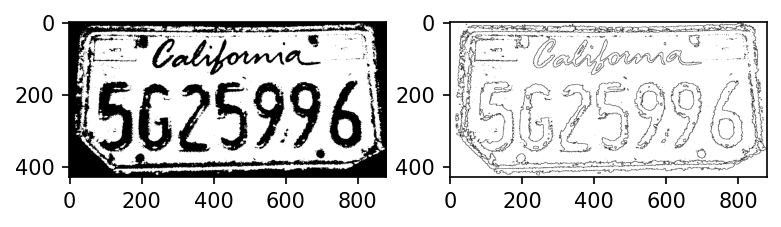

In [57]:
#@title Selecccione Limites { run: "auto" }
Figure_of_Interest_Colour = "Black" #@param ['White','Black']
Exels_Size = 3 #@param {type:"slider", min:3, max:7, step:2}

if Figure_of_Interest_Colour == "White":
  exels = np.zeros((Exels_Size,Exels_Size))+1
  color=1
elif Figure_of_Interest_Colour == "Black":
  exels = np.zeros((Exels_Size,Exels_Size))
  color=0

imagek = y01.copy()

Type_of_Edge = "Inner" #@param ['Outer','Inner']

if Type_of_Edge =='Outer':
  imagexels = adapt_image_to_exels(imagek,exels)
  imagek = dilation_morphological_image(imagexels,exels,color)
  imagek = imagek[:,:]-y01[:,:]
elif Type_of_Edge =='Inner':
  imagexels = adapt_image_to_exels(imagek,exels)
  imagek = erosion_morphological_image(imagexels,exels,color)
  imagek = y01[:,:]-imagek[:,:]

Save_Image = "Yes" #@param ['Yes','No']
if Save_Image == "Yes":
  name = "Edge_Morph_Image"
  if Type_of_Edge == 'Outer':
    name2 = 'Outer_'
  elif Type_of_Edge == 'Inner':
    name2 = 'Inner_'
  io.imwrite(name2 + name +'.jpg', imagek)
elif Save_Image == "No":
  imagek = imagek

fig,ax = plt.subplots(1,2, dpi=150)
ax[0].imshow(y01,'gray')
ax[1].imshow(imagek,'gray')

### Morphological Operations  -  Median

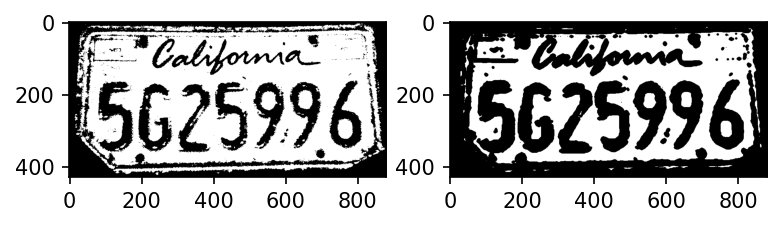

In [35]:
#@title Selecccione Limites { run: "auto" }
Exels_Size = 3 #@param {type:"slider", min:3, max:7, step:2}
exels = np.zeros((Exels_Size,Exels_Size))

imagek = y01.copy()

Repeat = 6 #@param {type:"slider", min:1, max:50, step:1}
for z in range(Repeat):
  imagexels = adapt_image_to_exels(imagek,exels)
  imagek = median_morphological_image(imagexels,exels)

Save_Image = "No" #@param ['Yes','No']
if Save_Image == "Yes":
  name = "Median_Morph_Image"
  io.imwrite(name +'.jpg', imagek)
elif Save_Image == "No":
  imagek = imagek

fig,ax = plt.subplots(1,2, dpi=150)
ax[0].imshow(y01,'gray')
ax[1].imshow(imagek,'gray')

### Morphological Operations  -  Top-hat

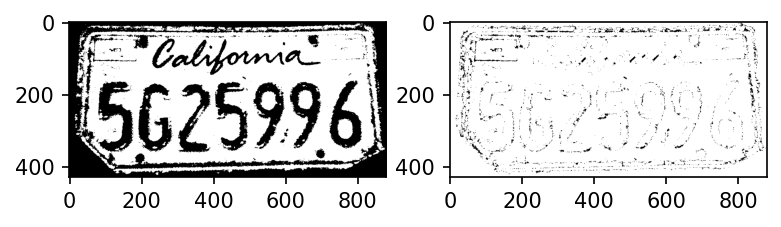

In [58]:
#@title Selecccione Limites { run: "auto" }
Figure_of_Interest_Colour = "Black" #@param ['White','Black']
Exels_Size = 5 #@param {type:"slider", min:3, max:7, step:2}

if Figure_of_Interest_Colour == "White":
  exels = np.zeros((Exels_Size,Exels_Size))+1
  color=1
elif Figure_of_Interest_Colour == "Black":
  exels = np.zeros((Exels_Size,Exels_Size))
  color=0

imagek = y01.copy()

imagexels = adapt_image_to_exels(imagek,exels)
imagek = erosion_morphological_image(imagexels,exels,color)
imagexels = adapt_image_to_exels(imagek,exels)
imagek = dilation_morphological_image(imagexels,exels,color)
imagek = y01 - imagek

Save_Image = "No" #@param ['Yes','No']
if Save_Image == "Yes":
  name = "Top-hat_Morph_Image"
  io.imwrite(name +'.jpg', imagek)
elif Save_Image == "No":
  imagek = imagek

fig,ax = plt.subplots(1,2, dpi=150)
ax[0].imshow(y01,'gray')
ax[1].imshow(imagek,'gray')

## Análisis de resultados:

**Imagen utilizada:** Matrícula deteriorada con información con contorno mal definido, residuo disperso fuera y dentro de la figura de interés

**Imagen trabajada en un sistema:** Binario

*Técnica de erosión morfológica:*
- Ventaja: Elimina el ruido fuera de la figura de interés.
- Desventaja: aumenta el ruido presente dentro de la figura

*Técnica de dilatación morfológica:*
- Ventaja: Elimina el ruido presente dentro de la figura de interés.
- Desventaja: aumenta la proporción de ruido presente fuera de la imagen de interés

*Técnica de apertura morfológica:*
- Ventaja: Elimina el ruido fuera de la imagen de interés que es más pequeño que el tamaño del exel.
- Desventaja: elimina la información que es más pequeña que el tamaño del exel de la imagen de interés

*Técnica de cierre morfológico:*
- Ventaja: Elimina los ruidos que hay dentro de la imagen, que son más pequeños que el tamaño del exel.
- Desventaja: puede fusionar el ruido que está fuera de la imagen con la figura de interés (si tienen el mismo valor de píxel)

Técnica de morfología de bordes (externos e internos):
- Ventaja: Discretiza el límite de los contornos en la figura.
- No funciona con la mejora del ruido.

*Técnica morfológica mediana:*
- Ventaja: Puede eliminar defectos en los contornos. haciéndolos más definidos
- Desventaja: aumenta la representación de ruidos fuera de la figura de interés y puede vincularlos con la fuga de interés

*Técnica morfológica de sombrero de copa:*
- Ventaja: eliminar de la figura todas las formas que sean más grandes que el exel utilizado
- Desventaja: No resuelve problemas con el ruido.

**La mejor solución para el ejemplo propuesto:** Utilice una combinación de técnicas morfológicas